<h2 style = "color : Green">Case Study - Risk Analysis </h2>

### PROBLEM STATEMENT :

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

-If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

<h4 style = "color : Blue">Importing the libraries</h4>

In [7]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [8]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

<h4 style = "color : Blue">Read the Data set </h4> 

In [9]:
# Read data from file 'application_data.csv' 
application = pd.read_csv('application_data.csv')

In [10]:
# Preview the first 5 lines of the loaded data
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<h4 style = "color : Blue">Inspect the dataframe</h4>  

In [11]:
# Datatypes of each column
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [12]:
# Determining the number of rows and columns
application.shape

(307511, 122)

<h4 style = "color : Blue"> Data Handling and Cleaning </h4> 


In [13]:
# Determining the count of null values
application.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

<h4 style = "color : Blue">Data Handling and Cleaning</h4>  

In [14]:
# Determing the percentage of null values
nullpercent=100*(application.isna().sum()/len(application.index))

In [15]:
# finding columns with more 50% of nul values
len(nullpercent[nullpercent>=50])

41

In [16]:
nullpercent[nullpercent>=50]

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

<h4 style = "color : Red"> After analysing these columns we can say that these have more than 50% of missing values and are not required for analysis. Therefore we can drop these coulumns </h4>

In [17]:
# dropping columns
application.drop(nullpercent[nullpercent>=50].index, axis=1,inplace=True)

In [18]:
application.shape

(307511, 81)

In [19]:
#analysing the coulmns left
nullpercent[nullpercent<50]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

Dropping some more columns with high null percentage and which are not that important for analysis. 
EXT_SOURCE_3 can be dropped as EXT_SOURCE_2 which has less null percentage can be used for analysis.


In [20]:
drop_col=['EXT_SOURCE_3',
'YEARS_BEGINEXPLUATATION_AVG',
'FLOORSMAX_AVG',
'YEARS_BEGINEXPLUATATION_MODE',
'FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_MEDI',
'FLOORSMAX_MEDI',
'TOTALAREA_MODE',
'EMERGENCYSTATE_MODE' ]

In [21]:
#drop some more columns with high null perecentage
application.drop(drop_col,axis=1,inplace=True)

In [22]:
application.shape

(307511, 72)

 <h4 style = "color : Blue">Imputing missing values</h4> 

For columns which has less percentage(around 13% or so), checking what will be the best metric to impute missing values like if the column we are checking is a categorical column check,which category you can use to fill the null values.for others check does mean or median can be imputed or not.Others cases may be imputing with 0.you need to do this task for some variables and not for all, say 5-6

In [23]:
#Missing values in "AMT_ANNUITY" column
application.AMT_ANNUITY.isnull().sum()

12

In [24]:
# Determing the percentage of null values
missing_value = 100*(application.isna().sum()/len(application.index))
missing_value = missing_value[(missing_value <=13) & (missing_value !=0)]
missing_value

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

 <h4 style = "color : Red">From the above list the columns that have less than 13% missing values is AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, CNT_FAM_MEMBERS, EXT_SOURCE_2, BS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE</h4>

 <h4 style = "color : Blue">Taking value at a time</h4> 
 
 ### AMT_ANNUITY

count of null values :  12
First 5 lines : 
  0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
Describing the data : 
   count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
Plotting the Box plot : 


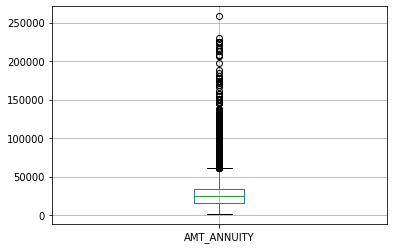

median value :   24903.0


In [25]:
# AMT_ANNUITY
#Missing values in "AMT_ANNUITY" column
print( 'count of null values : ',application.AMT_ANNUITY.isnull().sum())
print('First 5 lines : \n ',  application.AMT_ANNUITY.head()) # correct datatype
print('Describing the data : \n  ' ,  application.AMT_ANNUITY.describe())
print('Plotting the Box plot : ')
application.boxplot(column=['AMT_ANNUITY'])
plt.show()
# from box plot it seems, it has lot of outliers so considering median measure
print('median value :  ' ,application.AMT_ANNUITY.median())
# we can impute 24903(median) value in place of missing values

In [26]:
application[application.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,1,1,0,1,0,1,Secretaries,2.0,2,2,SATURDAY,1

 <h4 style = "color : Red">We can drop these missing values or impute it with median as it is numberic variable and has some outliers. If you delete the missing rows, you lose data. If you impute, you introduce bias</h4>

### AMT_GOODS_PRICE

count of null values :  278

 First 5 lines : 
  0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

 Describing the data : 
   count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
 
 Plotting the Box plot : 


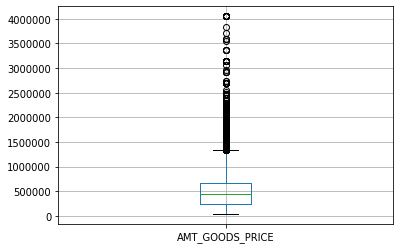

median value :   450000.0


In [27]:
# AMT_GOODS_PRICE
#Missing values in "AMT_GOODS_PRICE" column
print( 'count of null values : ',application.AMT_GOODS_PRICE.isnull().sum())
print('\n First 5 lines : \n ',  application.AMT_GOODS_PRICE.head()) # correct datatype
print('\n Describing the data : \n  ' ,  application.AMT_GOODS_PRICE.describe())
print(' \n Plotting the Box plot : ')
application.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()
# from box plot it seems, it has lot of outliers so considering median measure
print('median value :  ' ,application.AMT_GOODS_PRICE.median())
# we can impute 450000.0 value in place of missing values

 <h4 style = "color : Red">We can drop these missing values or impute it with median as it is numberic variable and has some outliers. If you delete the missing rows, you lose data. If you impute, you introduce bias</h4>

### NAME_TYPE_SUITE

count of null values :  1292
First 5 lines : 
  0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
 
 value count of each category : 

 Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
 
 mode value :   Unaccompanied

 Plotting the bar for each category


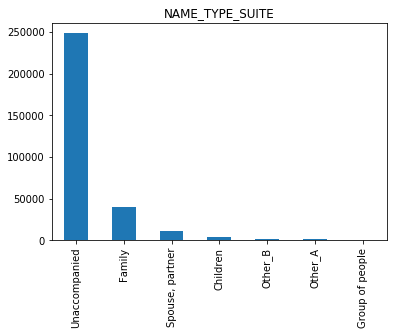


 mode :  Unaccompanied


In [28]:
# NAME_TYPE_SUITE
print( 'count of null values : ',application.NAME_TYPE_SUITE.isnull().sum())
print( 'First 5 lines : \n ', application.NAME_TYPE_SUITE.head()) # correct datatype
print(' \n value count of each category : \n\n' , application.NAME_TYPE_SUITE.value_counts())
mod= application.NAME_TYPE_SUITE.mode()[0]
print(' \n mode value :  ' , mod)
# considering the value to be imputed is - Unaccompanied
print( '\n Plotting the bar for each category')
application.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.title("NAME_TYPE_SUITE")
plt.show()

print( '\n mode : ', mod)


In [29]:
# fill the missing values with mode value of mod=application.NAME_TYPE_SUITE.
application.NAME_TYPE_SUITE.fillna(mod , inplace=True)

In [30]:
application.NAME_TYPE_SUITE.isnull().sum()  

0

### OCCUPATION_TYPE

In [31]:
# missing value in column OCCUPATION_TYPE 
application.OCCUPATION_TYPE .isnull().sum() 

96391

count of null values :  96391

null percentage : 31.345545362604916

First 5 lines :
 0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object
 
 value count of each category : 

 Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
 
 mode value :   Laborers

 Plotting the bar for each category


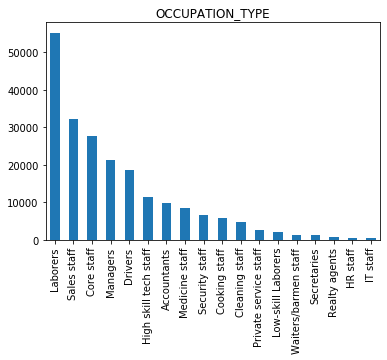


 mode :  Laborers


In [32]:
# OCCUPATION_TYPE
print( 'count of null values : ',application.OCCUPATION_TYPE.isnull().sum())
print('\nnull percentage :', nullpercent["OCCUPATION_TYPE"])
print( '\nFirst 5 lines :\n', application.OCCUPATION_TYPE.head()) # correct datatype
print(' \n value count of each category : \n\n' , application.OCCUPATION_TYPE.value_counts())
mod= application.OCCUPATION_TYPE.mode()[0]
print(' \n mode value :  ' , mod)
# considering the value to be imputed is - Unknown
print( '\n Plotting the bar for each category')
application.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title("OCCUPATION_TYPE")
plt.show()

print( '\n mode : ', mod)

 <h4 style = "color : Red">As this is a very important column and it is a categorical variable so let's just treat the null values as missing values.</h4>

In [33]:
application.OCCUPATION_TYPE.fillna("Unknown" , inplace=True)

In [34]:
application.OCCUPATION_TYPE.isnull().sum()

0

### CNT_FAM_MEMBERS

count of null values :  2
First 5 lines : 
  0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64
Describing the data : 
  count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
Plotting the Box plot : 


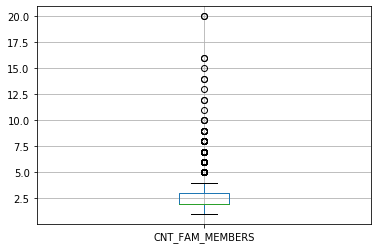

Median value :   2.0


In [35]:
#CNT_FAM_MEMBERS

print( 'count of null values : ',application.CNT_FAM_MEMBERS.isnull().sum())
print( 'First 5 lines : \n ', application.CNT_FAM_MEMBERS.head()) # correct datatype
print( 'Describing the data : \n ', application.CNT_FAM_MEMBERS.describe())
print('Plotting the Box plot : ')
application.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()
# from box plot it seems, it has lot of outliers so considering median measure
print('Median value :  ' , application.CNT_FAM_MEMBERS.median())

In [36]:
# imputing this with its median
median= application.CNT_FAM_MEMBERS.median()
application.CNT_FAM_MEMBERS.fillna(median , inplace=True)

application.CNT_FAM_MEMBERS.isnull().sum()

0

### EXT_SOURCE_2

count of null values :  660

First 5 lines : 
  0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

Describing the data : 
  count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

Plotting the Box plot : 


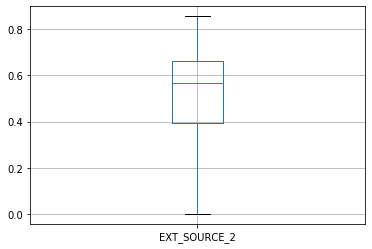

median value :   0.5659614260608526


In [37]:
#CNT_FAM_MEMBERS

print( 'count of null values : ',application.EXT_SOURCE_2.isnull().sum())
print( '\nFirst 5 lines : \n ', application.EXT_SOURCE_2.head()) # correct datatype
print( '\nDescribing the data : \n ', application.EXT_SOURCE_2.describe())
print( '\nPlotting the Box plot : ')
application.boxplot(column=['EXT_SOURCE_2'])
plt.show()
# from box plot it seems, mean and median are almost near and no outliers but there is some tilt towards outliers so go with median
print('median value :  ' , application.EXT_SOURCE_2.median())
# so, we can impute 0.5659614260608526 value in place of missing values

In [38]:
# imputing this with its median
median= application.EXT_SOURCE_2.median()
application.EXT_SOURCE_2.fillna(median , inplace=True)

application.EXT_SOURCE_2.isnull().sum()

0

 <h4 style = "color : Red">Since the median for the following columns:


(OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE) 

is 0 so we are not performing any imputation on it</h4>

In [39]:
# checking the datatypes of all the columns
print(application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [40]:
# finding count of unique values in each column
print(application.nunique().sort_values())

LIVE_REGION_NOT_WORK_REGION         2
FLAG_EMAIL                          2
FLAG_DOCUMENT_10                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_11                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

In [41]:
# Checking the values in DAYS_BIRTH column
application.DAYS_BIRTH.value_counts() 

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14395    39
-14267    39
-13263    39
-11664    39
-13584    38
-15565    38
-13788    38
-13480    38
-15042    38
-13634    38
-13891    38
-14791    38
-13217    37
-15450    37
-10136    37
-20074    37
-15048    37
-16690    37
-10107    37
-15563    37
-14790    37
-14767    37
-10192    37
-14890    37
-16257    37
-12806    37
-11108    37
-14276    37
-13706    36
-13904    36
-15322    36
-14926    36
-13708    36
-13643    36
-11524    36
-13271    36
-10519    36
-14137    36
-14776    36
-14386    36
-10213    35
-16490    35
-10123    35
-11588    35
-9981     35
-11266    35
-15044    35
-10088    35
-14120    35
-15073    35
-14825    35
-11097    35
-12776    35
-15155    35
-13254    35
-13273    35
-13922    35
-14099    35
-10223    35
-10978    35
-12682    35
-15164    35
-16185    35
-11135    35
-14131    35
-15009    35
-14384    35
-12433    35
-14350    35
-16830    35
-13687    35

 <h4 style = "color : Red">There are some columns with negative values which needs to be changed to positive values
    
 DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE</h4>

In [42]:
# converting negative DAYS_BIRTH value to positive value
application['DAYS_BIRTH']=application['DAYS_BIRTH'].abs()

# converting negative DAYS_EMPLOYED value to positive value
application['DAYS_EMPLOYED']=application['DAYS_EMPLOYED'].abs()

# converting negative DAYS_REGISTRATION value to positive value
application['DAYS_REGISTRATION']=application['DAYS_REGISTRATION'].abs()

# converting negative DAYS_ID_PUBLISH value to positive value
application['DAYS_ID_PUBLISH']=application['DAYS_ID_PUBLISH'].abs()

# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
application['DAYS_LAST_PHONE_CHANGE']=application['DAYS_LAST_PHONE_CHANGE'].abs()

application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# conversion of columns integer to categorical
for col in application.columns:
    if application[col].nunique() <= 3: # here considering columns with 3 unique values as categorical variables
        application[col] = application[col].astype(object)

application.info() 
application.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null object
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELAT

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h4 style = "color : Red">For numerical columns check for outliers and report them for atleast 5 variables. Added observations and reasoning</h4>

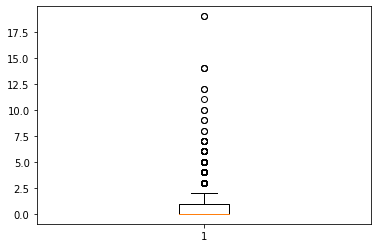

The values greater than 2.5 are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier


In [44]:
plt.boxplot(application['CNT_CHILDREN'])
plt.show()

Q1 = application['CNT_CHILDREN'].quantile(0.25)
Q3 = application['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("The values greater than {} are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier".format(upperwhisker))

<h4 style = "color : Red">From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers</h4> 

<h4 style = "color : Red">According to Statictics the values above the upper whisker and below the lower whisker are considered as outliers and as we can see in plot outliers are present only above the upper wisker so considering them as outliers</h4>

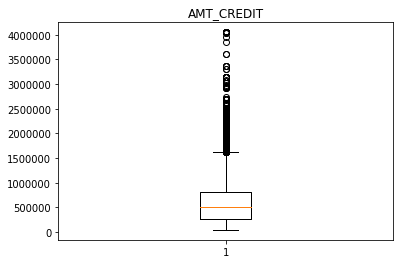

The amount credited greater than 1616625.0 can be considered as an outlier


In [45]:
plt.boxplot(application['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()
# From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers. 
Q1 = application['AMT_CREDIT'].quantile(0.25)
Q3 = application['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)


#print("Lowerwhisker:{}".format(lowerwhisker))

print("The amount credited greater than {} can be considered as an outlier".format(upperwhisker))

<h4 style = "color : Red">From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers</h4>

 <h4 style = "color : Red">The values above the upper whisker and below the lower whisker are considered as outliersand as we can see in plot outliers are present only above the upper wisker so considering them as outliers</h4> 

<h4 style = "color : Red">According to statistics the the values less than lower whisker value -537975.0 considered as outlier, as credit amount cannot be negative we consider amount greater than  1616625.0 as an outlier</h4> 

In [46]:
print('\nDescribing the data of AMT_CREDIT :\n' ,application['AMT_CREDIT'].describe())
print('\nmaximun value : ' , application['AMT_CREDIT'].max())


Describing the data of AMT_CREDIT :
 count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

maximun value :  4050000.0


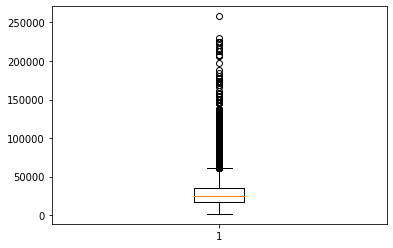

Population relative count greater than 61704.0 is considered to be an outlier


In [47]:

data=application['AMT_ANNUITY']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()
# . 
Q1 = application['AMT_ANNUITY'].quantile(0.25)
Q3 = application['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)


print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))

<h4 style = "color : Red">From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers</h4> 

<h4 style = "color : Red">The values above the upper whisker and below the lower whisker are considered as outliers
and as we can see in plot outliers are present only above the upper wisker so considering them as outliers</h4> 

<h4 style = "color : Red">According to statistics the the values less than lower whisker value -10584.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  61704.0 as an outlier</h4> 

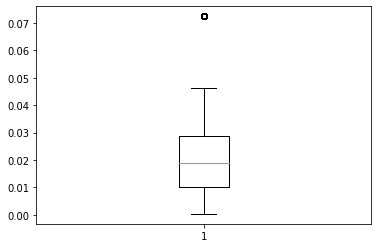

Population relative count greater than 0.056648500000000004 is considered to be an outlier


In [48]:
plt.boxplot(application['REGION_POPULATION_RELATIVE'])
plt.show()

Q1 = application['REGION_POPULATION_RELATIVE'].quantile(0.25)
Q3 = application['REGION_POPULATION_RELATIVE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))

<h4 style = "color : Red">From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers</h4> 

<h4 style = "color : Red">The values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers </h4> 

<h4 style = "color : Red">According to statistics the the values less than lower whisker value -0.017979500000000002 considered as outlier, as people relative cannot be negative we consider count greater than  0.056648500000000004 as an outlier</h4> 

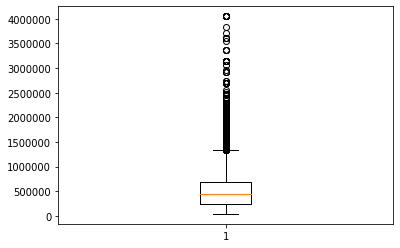

Population relative count greater than 1341000.0 is considered to be an outlier


In [49]:
data=application['AMT_GOODS_PRICE']
filtered_data = data[~np.isnan(data)]
plt.boxplot(filtered_data)
plt.show()

Q1 = application['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

print("Population relative count greater than {} is considered to be an outlier".format(upperwhisker))

<h4 style = "color : Red">From box plot, we can conclude that there exists values which are above upper whisker(maximum) considered to be as outliers</h4> 

<h4 style = "color : Red">The values above the upper whisker and below the lower whisker are considered as outliers
#and as we can see in plot outliers are present only above the upper wisker so considering them as outliers</h4> 

<h4 style = "color : Red">according to statistics the the values less than lower whisker value -423000.0 considered as outlier, 
   as amount cannot be negative we consider count greater than  1341000.0 as an outlier</h4> 

In [50]:
#Checking the top 10 rows of data
application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,1.0,0.0,1.0,0.0,1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,2.0,0.0,2.0,0.0,107

<h4 style = "color : Orange">Binning of continuous variables. Check if we need to bin any variable in different categories. Checking this for atleast 2 variables</h4>  

In [51]:
# AMT_INCOME_TOTAL

q1=application['AMT_INCOME_TOTAL'].quantile(0.25)
q2=application['AMT_INCOME_TOTAL'].quantile(0.50)
q3=application['AMT_INCOME_TOTAL'].quantile(0.75)
m=application['AMT_INCOME_TOTAL'].max()

<h4 style = "color : Blue">Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values</h4> 

In [52]:
application['AMT_INCOME_TOTAL_bin'] = pd.cut(application['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(application.AMT_INCOME_TOTAL_bin.value_counts())

medium    82213
High      71538
Low       53182
Name: AMT_INCOME_TOTAL_bin, dtype: int64


In [53]:
# AMT_CREDIT
q1=application['AMT_CREDIT'].quantile(0.25)
q2=application['AMT_CREDIT'].quantile(0.50)
q3=application['AMT_CREDIT'].quantile(0.75)
m=application['AMT_CREDIT'].max()

<h4 style = "color : Blue">Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values</h4> 

In [54]:
application['AMT_CREDIT_bin'] = pd.cut(application['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(application.AMT_CREDIT_bin.value_counts())

medium    77786
High      75876
Low       75428
Name: AMT_CREDIT_bin, dtype: int64


<h3 style = "color : Blue">Checking the imbalance percentage</h3>

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


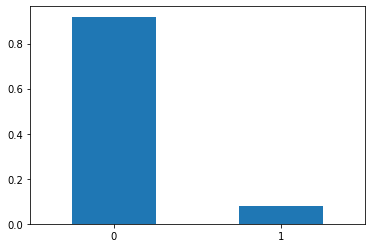

In [55]:
print(100*application.TARGET.value_counts()/ len(application))
(application.TARGET.value_counts()/ len(application)).plot.bar()
plt.xticks(rotation=0)
plt.show()

<h4 style = "color : Red">: In application there exists 91.927118% of "not default" and 8.072882% of "default" customers</h4>

<h3 style = "color : Purple">Data Visulization </h3>

<h3 style = "color : #E4508F"> Categorical Unordered Univariate Analysis </h3>
<h4 style = "color : #E4508F"> Unordered data do not have the notion of high-low, more-less etc </h4>

<h3 style = "color : Orange">Plot the bar graph of percentage NAME_INCOME_TYPE categories</h3> 

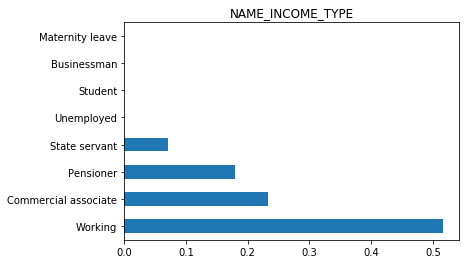

In [56]:
application.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title("NAME_INCOME_TYPE")
plt.show()

<h4 style = "color : #AB93C9">Calculate the percentage of each NAME_INCOME_TYPE_TYPE category</h4> 

In [57]:
application.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

<h4 style = "color : Red">Inference: Most clients are working proffessionals with working income and least are on income of maternity leave</h4> 

<h3 style = "color : Orange">Plot the pie chart of CODE_GENDER  categories</h3> 

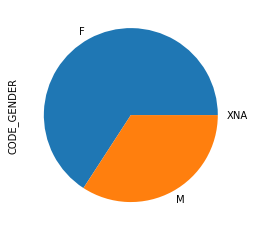

In [58]:
application.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.show()

<h4 style = "color : Red">Inference: Female clients are more than male clients but still there are least clients with income typ of 'maternity leave'. Therefore we can say that when any family is expecting they avoid applying for loans as they have different financial commitments for the coming new member of the family</h4>

<h3 style = "color : Orange">Plot the bar graph of percentage NAME_FAMILY_STATUS categories</h3> 

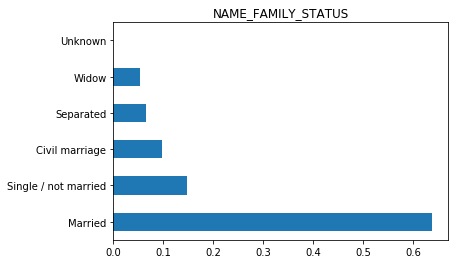

In [59]:
application.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title("NAME_FAMILY_STATUS")
plt.show()

<h4 style = "color : Red">Inference: We can infer that married people apply for loan more as compared to single people</h4>

<h3 style = "color : Orange">Plot the bar graph of percentage OCCUPATION_TYPE categories</h3> 

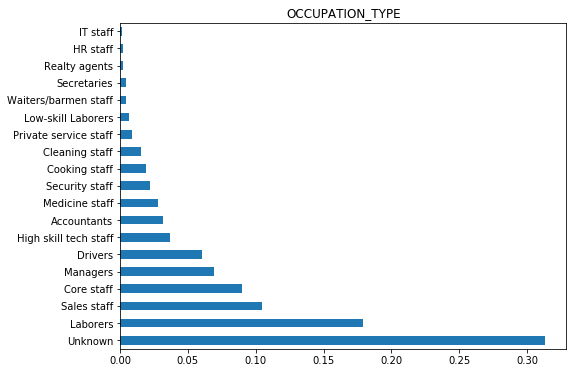

In [60]:
plt.figure(figsize=[8,6])
application.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("OCCUPATION_TYPE")
plt.show()

<h4 style = "color : Red">Inference: Maximum clients are of labourer occupation and minimum is IT staff</h4>

<h3 style = "color : #E4508F"> Categorical ordered univariate analysis </h3>

<h4 style = "color : #E4508F"> Ordered variables have some kind of ordering </h4> 

<h4 style = "color : #AB93C9">Calculate the percentage of each NAME_EDUCATION_TYPE category</h4> 

In [61]:
application.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

<h3 style = "color : Orange">Plot the bar graph of percentage NAME_EDUCATION_TYPE categories</h3> 

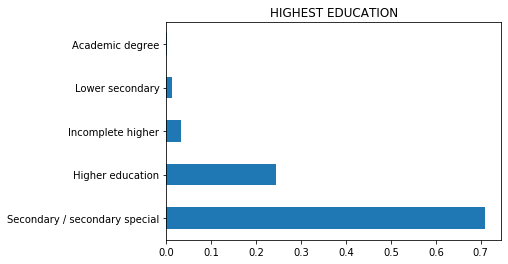

In [62]:
application.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("HIGHEST EDUCATION")
plt.show()

<h4 style = "color : Red">Inference: Most of the clients are educated till secondary level and clients with academic degree are the least</h4>

<h3 style = "color : #E4508F"> Numerical Univariate Analysis</h3>

<h4 style = "color : #E4508F"> AGE</h4> 

<h3 style = "color : Orange">DAYS_BIRTH Histogram/Density plot</h3> 

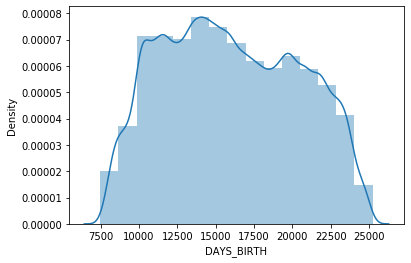

In [63]:
sns.distplot(application.DAYS_BIRTH, bins=15)
plt.show()


<h4 style = "color : #AB93C9">Creating bins for days_birth</h4> 
<h4 style = "color : #AB93C9">Converting numericalvariable to categorical for better analysis</h4> 

In [64]:
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']
application['AGE_RANGE']=pd.cut(application['DAYS_BIRTH'],bins,labels=slot)

<h3 style = "color : Orange">Plot the bar graph of percentage AGE_RANGE categories</h3> 

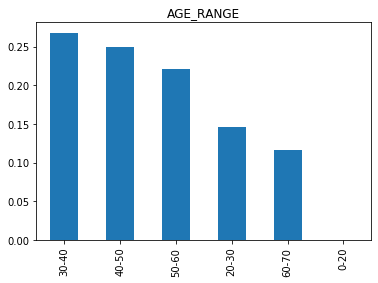

In [65]:
application.AGE_RANGE.value_counts(normalize=True).plot.bar()
plt.title("AGE_RANGE")
plt.show()


<h4 style = "color : Red">Inference: Maximum clients belongs to 30-40 age group</h4>

<h4 style = "color : #AB93C9">Creating bins for income amount</h4> 
<h4 style = "color : #AB93C9">converting numerical variable to categorical for better analysis</h4> 

In [66]:
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

application['AMT_INCOME_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slot)

<h3 style = "color : Orange">Plot the pie chart of AMT_INCOME_RANGE categories</h3> 

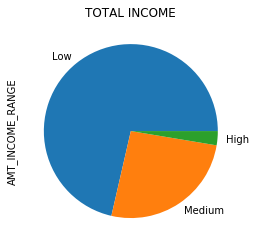

In [67]:
application.AMT_INCOME_RANGE.value_counts(normalize=True).plot.pie()
plt.title("TOTAL INCOME")
plt.show()

<h4 style = "color : Red">Inference: Most customers belong to low range total income. As it understood people with higher income don't need loans that much</h4>

<h4 style = "color : #AB93C9">Creating bins for Credit amount</h4> 
<h4 style = "color : #AB93C9">Converting numerical variable to categorical for better analysis</h4> 

In [68]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots)

<h3 style = "color : Orange">Plot the bar graph of percentage AMT_CREDIT_RANGE categories</h3> 

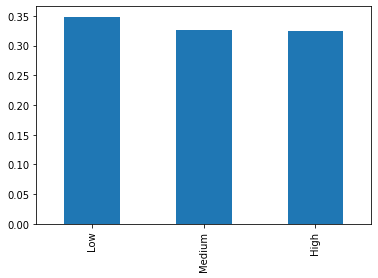

In [69]:

application.AMT_CREDIT_RANGE.value_counts(normalize=True).plot.bar()

plt.show()

<h4 style = "color : Red">Inference: Most of the customers have applied for low amount of credit for loan</h4>

<h3 style = "color : #E4508F"> Checking the Imbalance Percentage </h3>

<h4 style = "color : #AB93C9">Calculating the imbalance percentage</h4>

In [70]:
100*(application.TARGET.value_counts()) / (len(application))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<h4 style = "color : Red">Inference: 8.07% have clients have payment difficulties and 91.92% are having no difficulties</h4>

<h3 style = "color : Orange">Plot the bar graph of Imbalance</h3> 

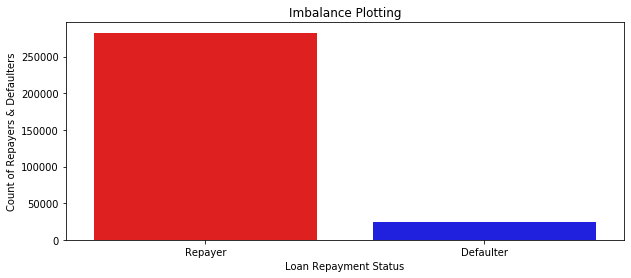

In [71]:
Imbalance = application["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['r','b'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

<h4 style = "color : #AB93C9">Dividing the dataset into two dataset of  target=1 (client with payment difficulties) and target=0 (all other)</h4>

In [72]:
target_1 = application[application['TARGET']==1]
target_0 = application[application['TARGET']==0]

<h3 style = "color : #E4508F"> Univariate analysis with respect to target variable</h3>

<h3 style = "color : Orange">Plot of AGE analysis for target_0 & target_1 dataframe</h3> 

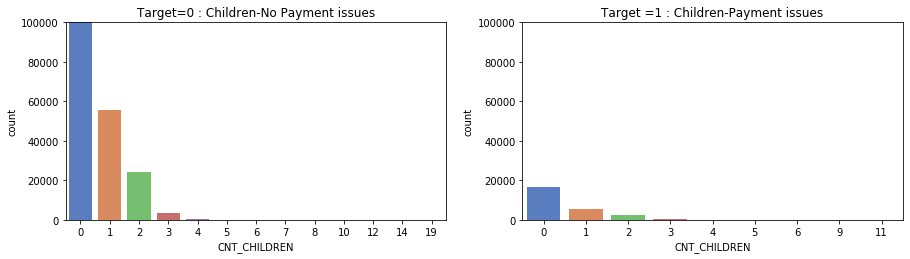

In [73]:
# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Children-No Payment issues')
sns.countplot(target_0['CNT_CHILDREN'],palette="muted")

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Children-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['CNT_CHILDREN'],palette="muted")
plt.show()

<h4 style = "color : Red">Inference: Most of the clients have 0 children and very few have more than 3 children. Banks can consider lending loans to people with no children</h4>

<h3 style = "color : Orange">Plot of AGE analysis for target_0 & target_1 dataframe</h3> 

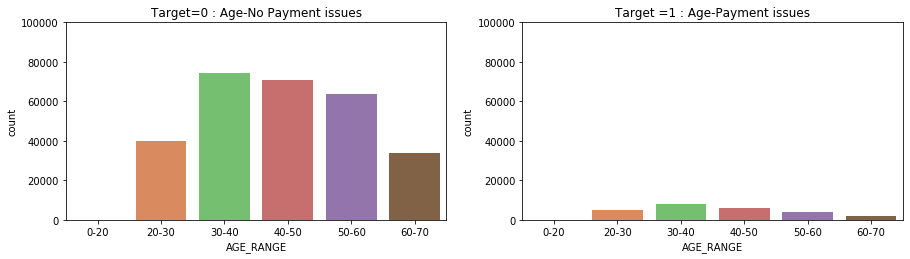

In [74]:
# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'],palette="muted")

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'],palette="muted")
plt.show()

<h4 style = "color : Red">Inference: As maximum customers belong to 30-40 age group which we observed earlier, we can infer from this graph that customers of age group 30-40 should be given loans as compared to other age groups because they are able to payback on time</h4>

<h3 style = "color : Orange">Plot of Amount credit range analysis for target_0 & target_1 dataframe</h3> 

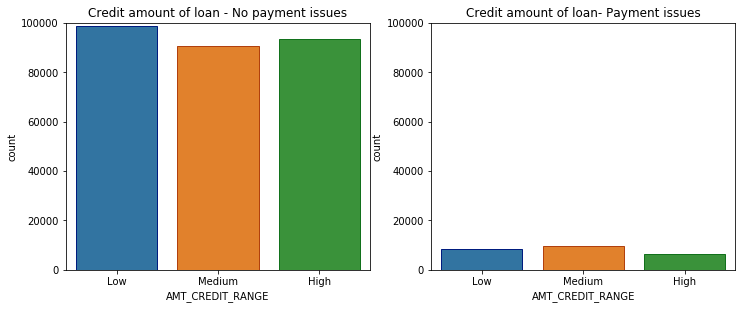

In [75]:
# subplot 1
plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'], edgecolor=sns.color_palette("dark", 3))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], edgecolor=sns.color_palette("dark", 3))
plt.show()

<h4 style = "color : Red">Inference: We can observe from this plot that low credit amounts are paid back with less issues. So banks can consider them while lending loans</h4>

<h3 style = "color : Orange">Plot of Categorical variable(OCUPATION_TYPE) analysis for target_0 & target_1 dataframe</h3> 

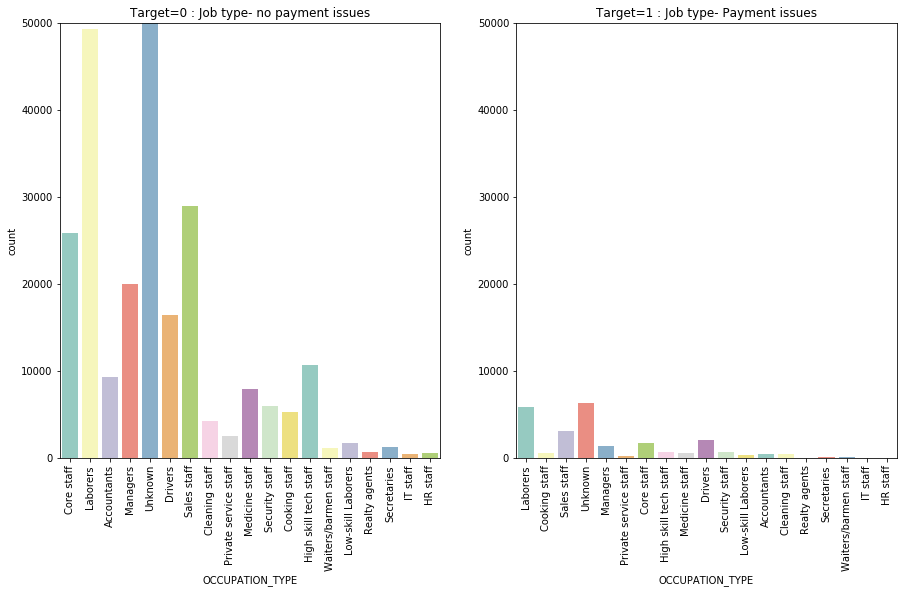

In [76]:
# subplot 1
plt.figure(figsize = (15,8))
plt.subplot(1, 2, 1)

#plt.subplots_adjust(wspace=0.5)
sns.countplot(target_0['OCCUPATION_TYPE'],palette="Set3")
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'],palette="Set3")
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

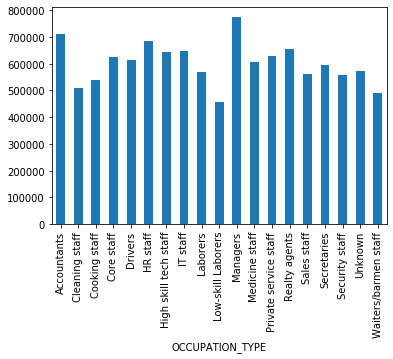

In [77]:
application.groupby("OCCUPATION_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.show()

<h4 style = "color : Red">Inference: From the above 3 graphs we can observe that count of labourers is high in both payment issue and no payment issue. Even the credit amount of labourers is low. So, we cannot surely predict that labourers cannot be defaulters but they can be given small amount of loan. Sales Staff and core staff are less likely to default</h4>

<h3 style = "color : Orange">Plot of NAME_INCOME_TYPE analysis for target_0 & target_1 dataframe</h3> 

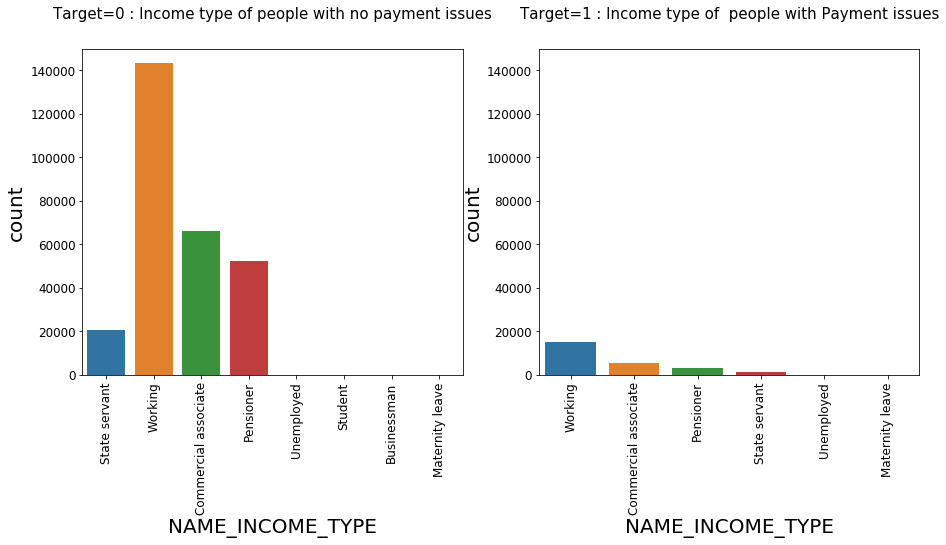

In [78]:
# subplot 1
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)

#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'])
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(target_1['NAME_INCOME_TYPE'])
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

<h4 style = "color : Red">Inference: We can observe that working professionals and state servants are more likely to pay back the loan on time</h4>

<h3 style = "color : Orange">Analyse continuous column with respect to the target column</h3> 

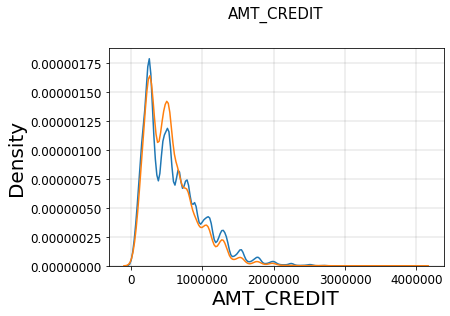

In [79]:
sns.distplot(target_0['AMT_CREDIT'],hist = False, label="Good")# Target = 0
sns.distplot(target_1['AMT_CREDIT'],hist = False, label='Bad')# Taget = 1

plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.title('AMT_CREDIT')
plt.show()

<h3 style = "color : Orange">Analyse continuous column with respect to the target column</h3> 

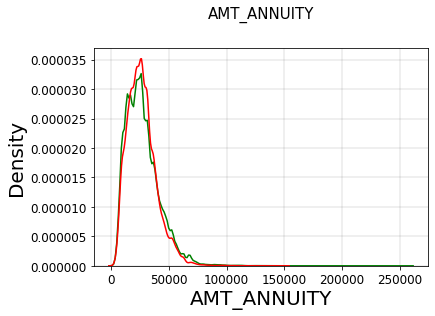

In [80]:
sns.distplot(target_0['AMT_ANNUITY'], hist = False, label="Good",color="g")# Target = 0
sns.distplot(target_1['AMT_ANNUITY'], hist = False, label="Bad",color="R")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

<h3 style = "color : Orange">Analyse continuous column with respect to the target column</h3> 

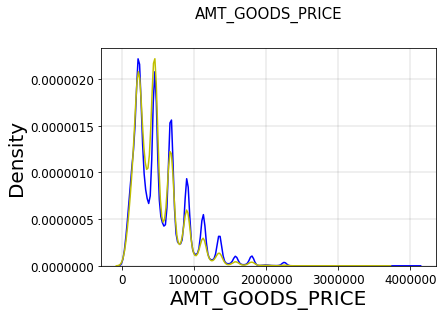

In [81]:
sns.distplot(target_0['AMT_GOODS_PRICE'], hist = False,label= "good",color="B")# Target = 0
sns.distplot(target_1['AMT_GOODS_PRICE'], hist = False, label="bad",color="Y")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

<h3 style = "color : Orange">Plot mutiple categorical columns with respect to Target column: Subplot</h3> 

In [82]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE'),
 (5, 'OCCUPATION_TYPE')]

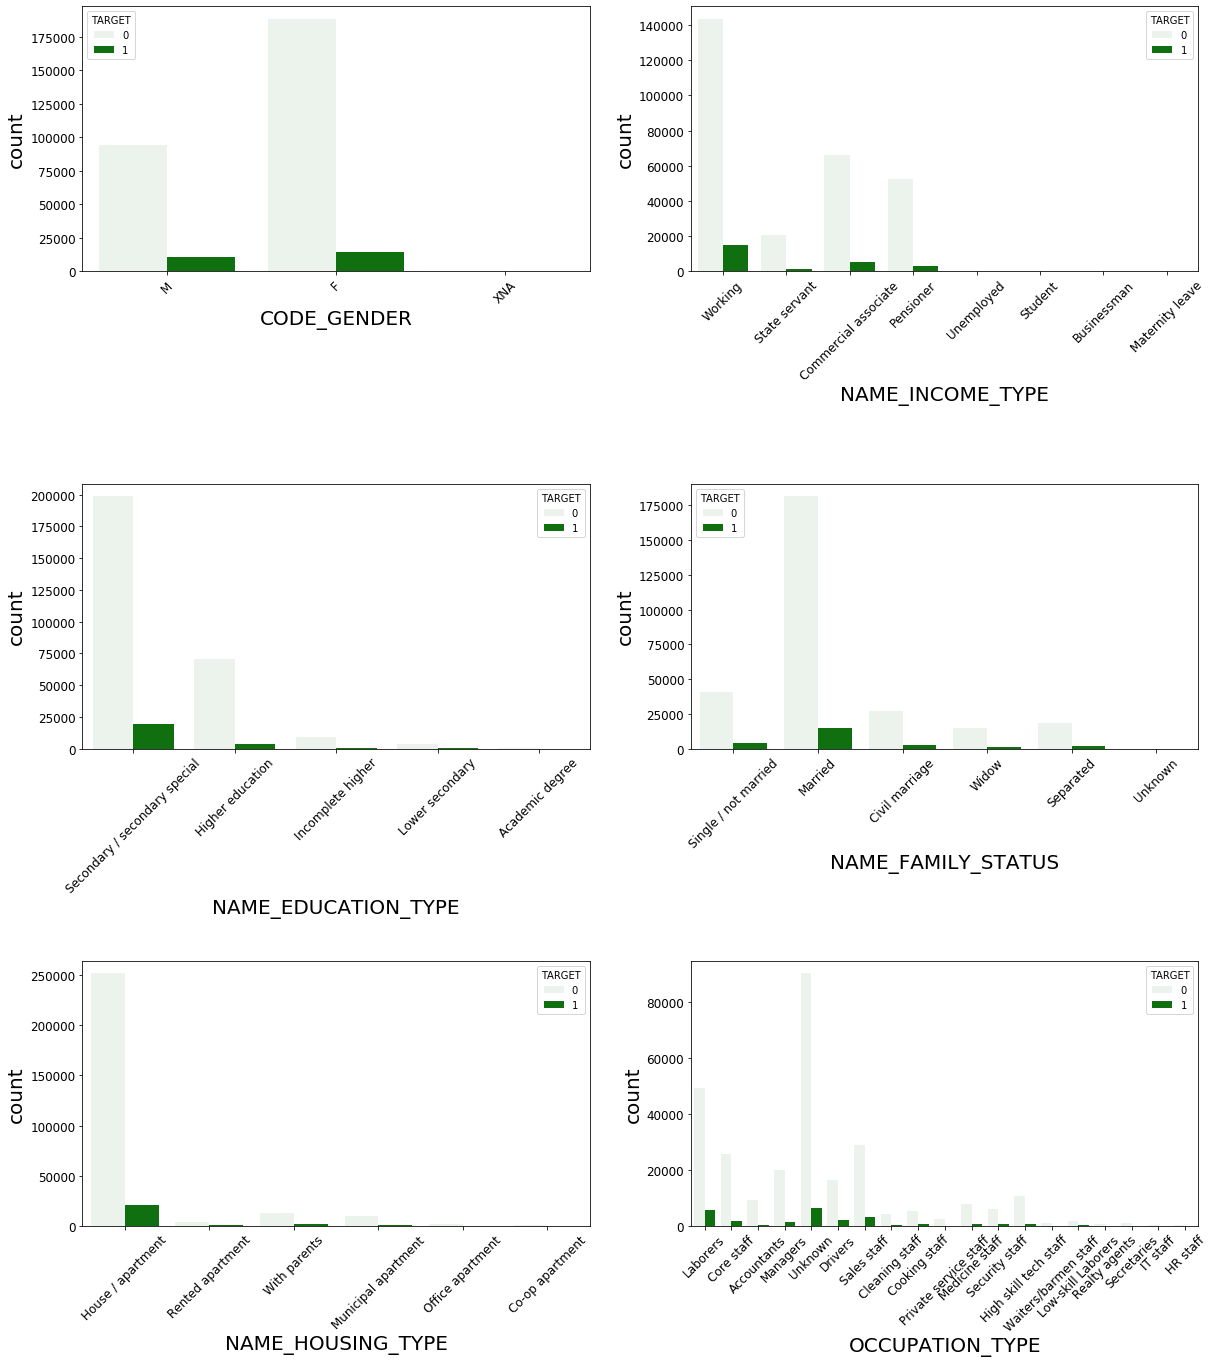

In [83]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = application,color="Green")
    plt.xticks(rotation = 45)
    

<h4 style = "color : Red">Inference:</h4> 
<h4 style = "color : Red">From plot 1: we can observe that banks can target more female customer for lending loans as they pay loan on time</h4>
<h4 style = "color : Red">From plot 2: we can observe Working clients can be targetted to lend loans as they've higher percent of giving payments on time</h4>
<h4 style = "color : Red">From plot 3: we can observe Customers with secondary education are maximum possibly to make payments while as compared to customers with academic degree</h4> 
<h4 style = "color : Red">From plot 4: we can observe Married customers have paid loan on time as compared to widow and separted</h4> 
<h4 style = "color : Red">From plot 5: we can observe customers with own house/apartment are most likely to make payment on time as compared to other customers</h4> 
<h4 style = "color : Red">From plot 6: we can observe sales staff and core staff have high percentage of payment at time</h4>


<h3 style = "color : Purple">Correlation</h3>

<h4 style = "color : #AB93C9">Correlation for target_1 dataframe</h4>

In [84]:
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
414,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
128,AMT_GOODS_PRICE,AMT_CREDIT,0.98
276,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
440,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
103,AMT_ANNUITY,AMT_CREDIT,0.75
129,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
207,DAYS_EMPLOYED,DAYS_BIRTH,0.58
415,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
389,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
232,DAYS_REGISTRATION,DAYS_BIRTH,0.29


<h4 style = "color : #AB93C9">Correlation matrix for all numerical column</h4>

In [85]:
corr=target_0.corr()
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
414,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
128,AMT_GOODS_PRICE,AMT_CREDIT,0.99
276,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
440,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
129,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
103,AMT_ANNUITY,AMT_CREDIT,0.77
207,DAYS_EMPLOYED,DAYS_BIRTH,0.63
102,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
127,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
176,DAYS_BIRTH,CNT_CHILDREN,0.34


<h4 style = "color : Red">Inference: From these correlations we can say that in both target_1 and target_2 data frames, social circle for 30days and 60 days and, goods_price and credit are highly correlated</h4>

<h4 style = "color : #AB93C9">Bivariate Analysis for target 0 and target 1</h4>
<h4 style = "color : #AB93C9">Numeric-Numeric analysis</h4>

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

<h3 style = "color : Orange">Scatter plot for numeric columns</h3> 

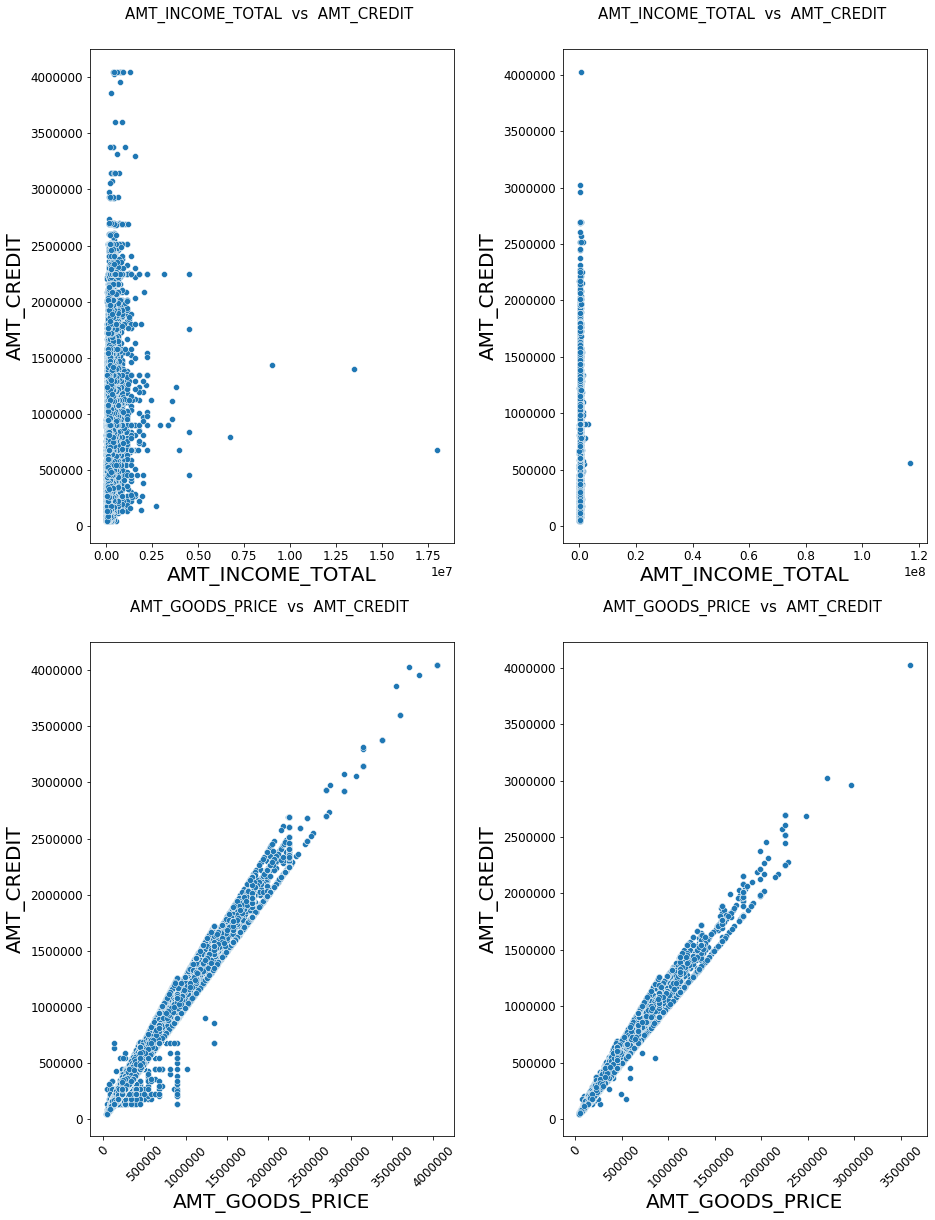

In [86]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

<h4 style = "color : Red">Inference:</h4>

<h4 style = "color : Red">1. Those who payback the loan on time can get higher credits. Mosty low income clients have difficulties in paying installments ans therefore they have low credits</h4>

<h4 style = "color : Red">2. Goods_price and credit have linear relationship. Clients who have paid back on time with higher goods_price have higher credit</h4>

<h3 style = "color : #E4508F"> Numerical Categorical Analysis</h3>

<h3 style = "color : Orange">Plot: Numeric variable analysis for target_0 & target_1 dataframe</h3> 

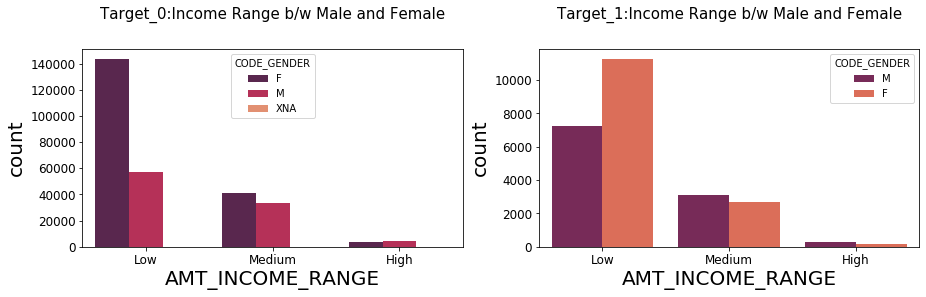

In [87]:
# subplot 1
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

In [88]:
target_0.CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

In [89]:
target_1.CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

<h4 style = "color : Red">From the above analysis we can say that females pay back the amount on time as compared to males</h4>

<h3 style = "color : Orange">Box plotting for Credit amount</h3>

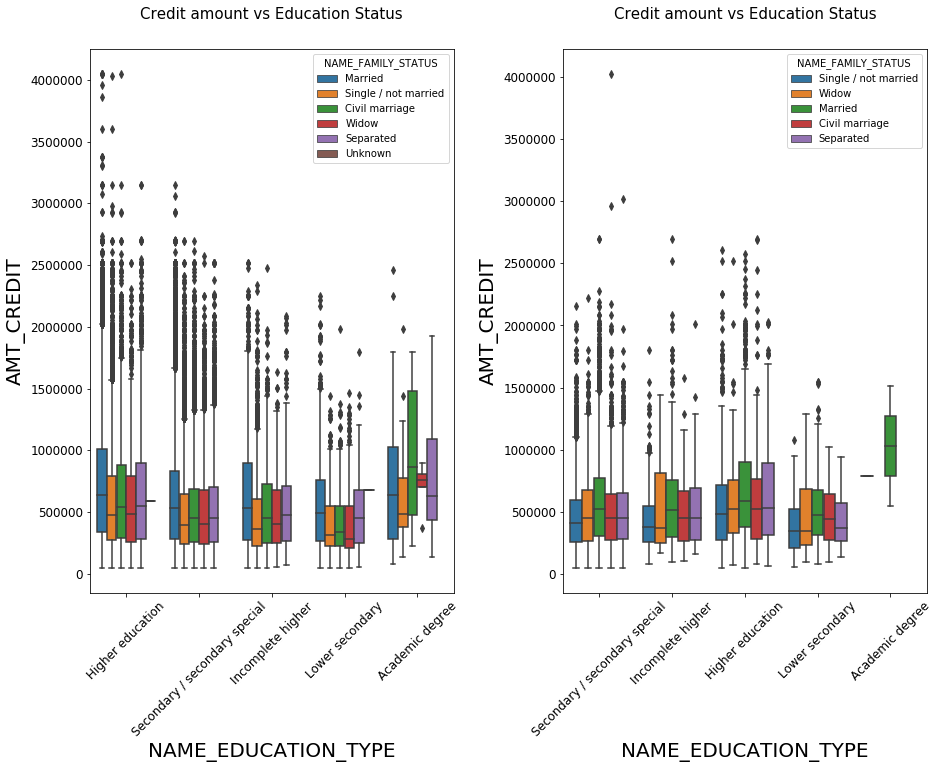

In [90]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

<h4 style = "color : Red">Inference:</h4>

<h4 style = "color : Red">1. Only Married people with acdemic degree have payment difficulties</h4>

<h4 style = "color : Red">2. Higher educated clients have higher credit and less payment difficuties</h4>

<h4 style = "color : Red">3. Secondary special clients have more payment difficulties wih more credit</h4>

<h4 style = "color : Red">4. Lower secondary educated clients have very low credits</h4>

<h3 style = "color : Orange">Box plotting for Income amount in logarithmic scale</h3>

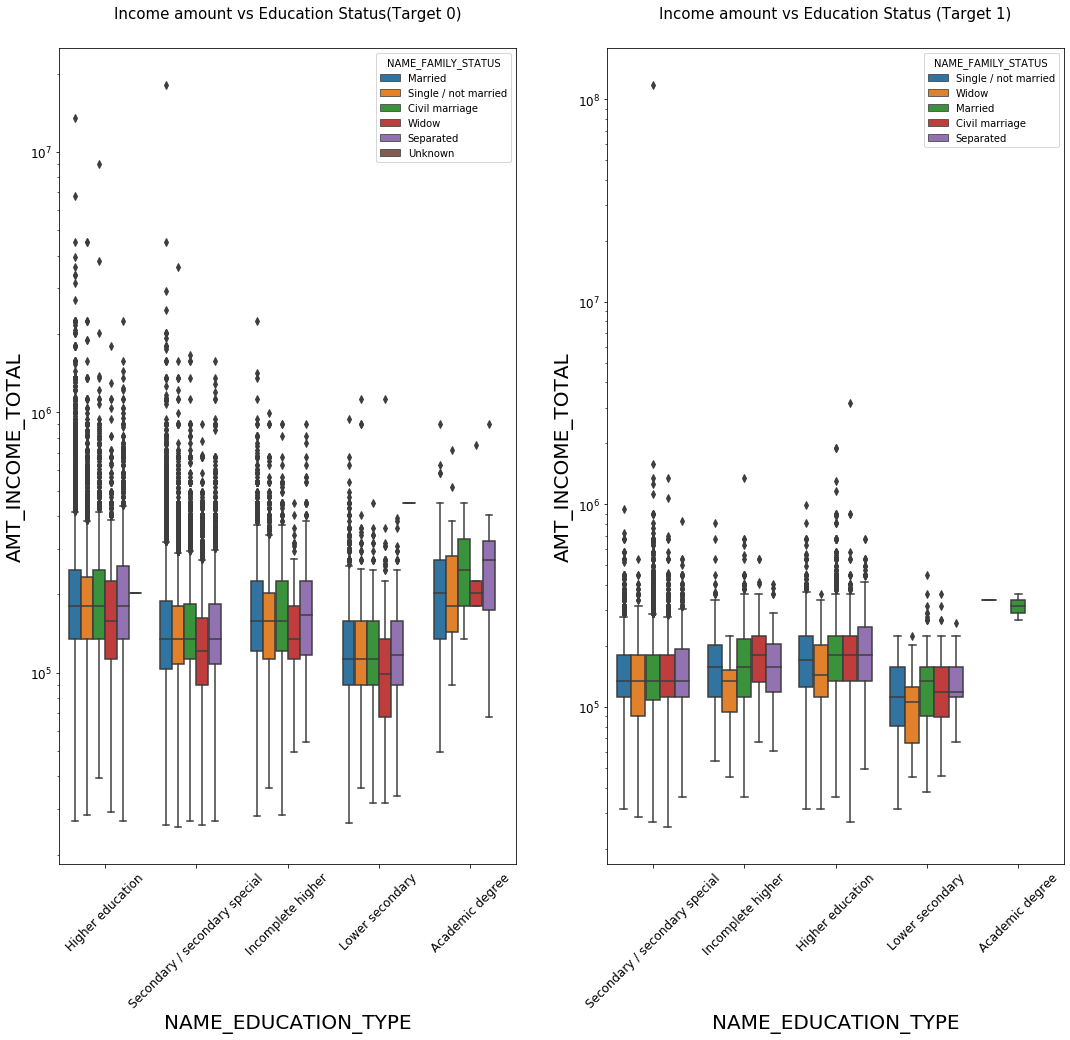

In [91]:
# subplot 1
plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)

# subplot 1
plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

<h4 style = "color : Red">Inference:</h4>

<h4 style = "color : Red">1. Higher education clients have highest incomes and low payment difficulties</h4>

<h4 style = "color : Red">2. People withlow income have payment difficulties specially in secondary category</h4>

<h4 style = "color : Red">3. Higher education has  many outliers</h4>

<h4 style = "color : Red">4. Lower secondary category has low income</h4>

<h4 style = "color : Red">"We can condlude that higher educated clients with good income can payback the loan on time"</h4>

<h3 style = "color : Purple">Reading the Previous application data  </h3>

In [92]:
#Reading the data from file previous_application 
papp=pd.read_csv("previous_application.csv")
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
papp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [94]:
# Finding the percentage of null values
100*(papp.isnull().sum()/len(papp))

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

<h4 style = "color : Blue">Dropping columns with more than 50% of missing data</h4> 

In [95]:
papp.drop("RATE_INTEREST_PRIMARY",axis=1,inplace=True)

In [96]:
papp.drop("RATE_INTEREST_PRIVILEGED",axis=1,inplace=True)

In [97]:
papp.drop(['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT'],axis=1,inplace=True)

In [98]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_FIRST_DRAWING',
                        'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']

In [99]:
papp.drop(Unnecessary_previous,axis=1,inplace=True)

In [100]:
papp.shape

(1670214, 23)

In [101]:
100*(papp.isnull().sum()/len(papp))

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_TYPE_SUITE           49.119754
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               22.286366
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.020716
dtype: float64

<h4 style = "color : Blue">All the other columns with null values can be imputed or null values can be treated as missing</h4>

In [102]:
#Merge the previous application with the current application data file
merged_df= pd.merge(application, papp, how='inner', on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin,AGE_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low,20-30,Medium,Medium,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,40-50,Medium,High,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,40-50,Medium,High,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,40-50,Medium,High,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with

In [103]:
merged_df.shape

(1413701, 99)

In [104]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 99 columns):
SK_ID_CURR                     1413701 non-null int64
TARGET                         1413701 non-null object
NAME_CONTRACT_TYPE_x           1413701 non-null object
CODE_GENDER                    1413701 non-null object
FLAG_OWN_CAR                   1413701 non-null object
FLAG_OWN_REALTY                1413701 non-null object
CNT_CHILDREN                   1413701 non-null int64
AMT_INCOME_TOTAL               1413701 non-null float64
AMT_CREDIT_x                   1413701 non-null float64
AMT_ANNUITY_x                  1413608 non-null float64
AMT_GOODS_PRICE_x              1412493 non-null float64
NAME_TYPE_SUITE_x              1413701 non-null object
NAME_INCOME_TYPE               1413701 non-null object
NAME_EDUCATION_TYPE            1413701 non-null object
NAME_FAMILY_STATUS             1413701 non-null object
NAME_HOUSING_TYPE              1413701 non-null object
REGIO

<h3 style = "color : #E4508F"> Univariate Analysis</h3>

<h3 style = "color : Orange">Distribution of contract status </h3>

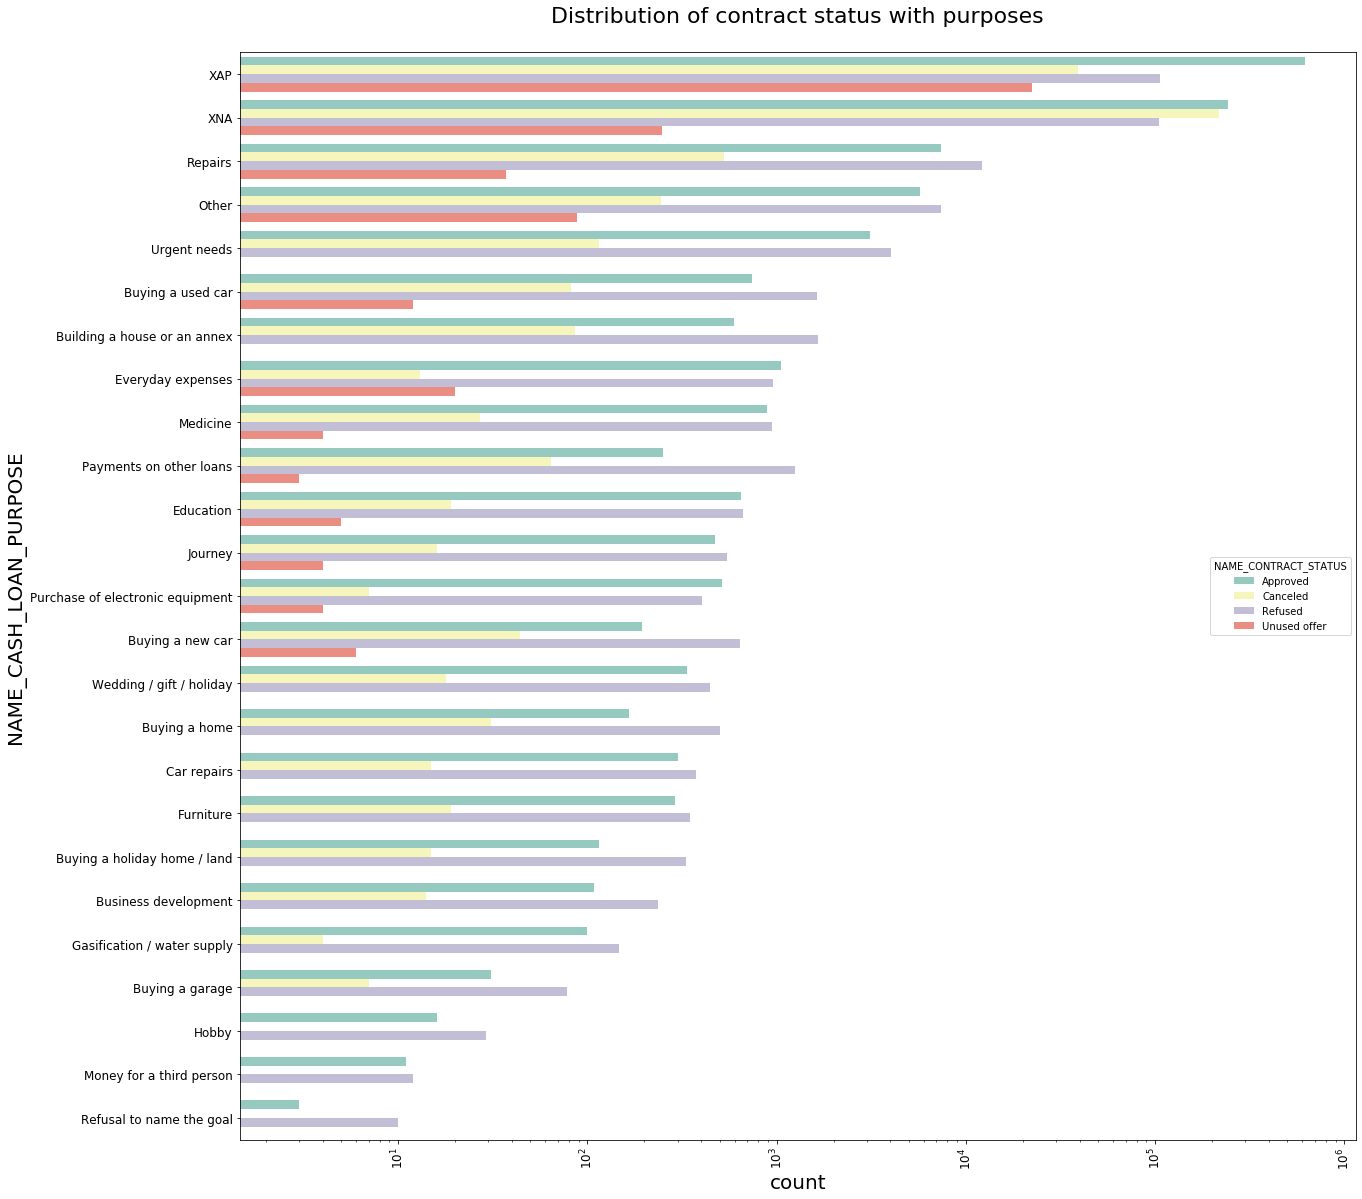

In [105]:
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = merged_df, y='NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Set3')

<h4 style = "color : Red">Inference:</h4>

<h4 style = "color : Red">1. Medicine and Education have same number of approved and refused offers</h4>

<h4 style = "color : Red">2. Repairs has more number of refused than approved which means it has high default rate</h4>

<h4 style = "color : Red">3. Buying a car also has more refused offers than approved which means banks consider it risky</h4>

<h4 style = "color : Red">4. It has huge number of missing values</h4>


<h3 style = "color : Orange">Distribution of contract status </h3>

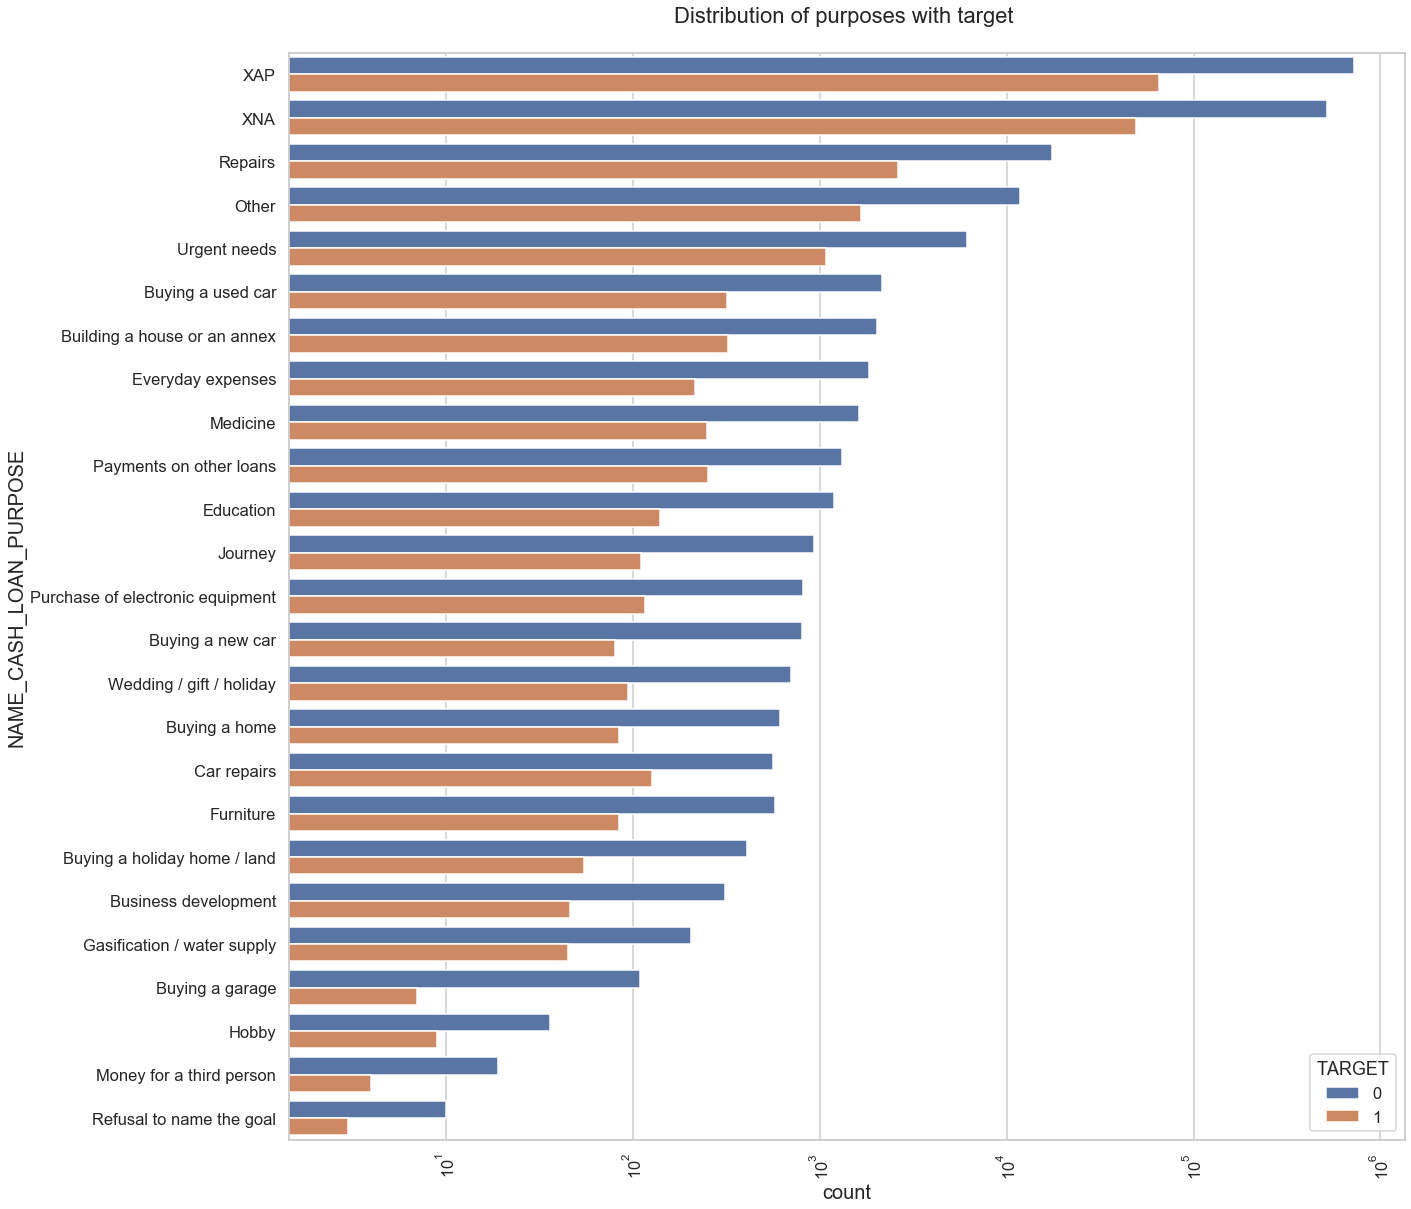

In [106]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette="deep")

<h4 style = "color : Red">Inference: Here also clients of loan purpose repairs have the most difficulty to payback the loan. There some cases like education, Buying a Home, Business development where less difficulties are faced for payment so, these categories can be considered for lending loan</h4>

<h3 style = "color : #E4508F"> Bivariate Analysis</h3>

<h3 style = "color : Orange">Box plotting for Credit amount in logarithmic scale </h3>

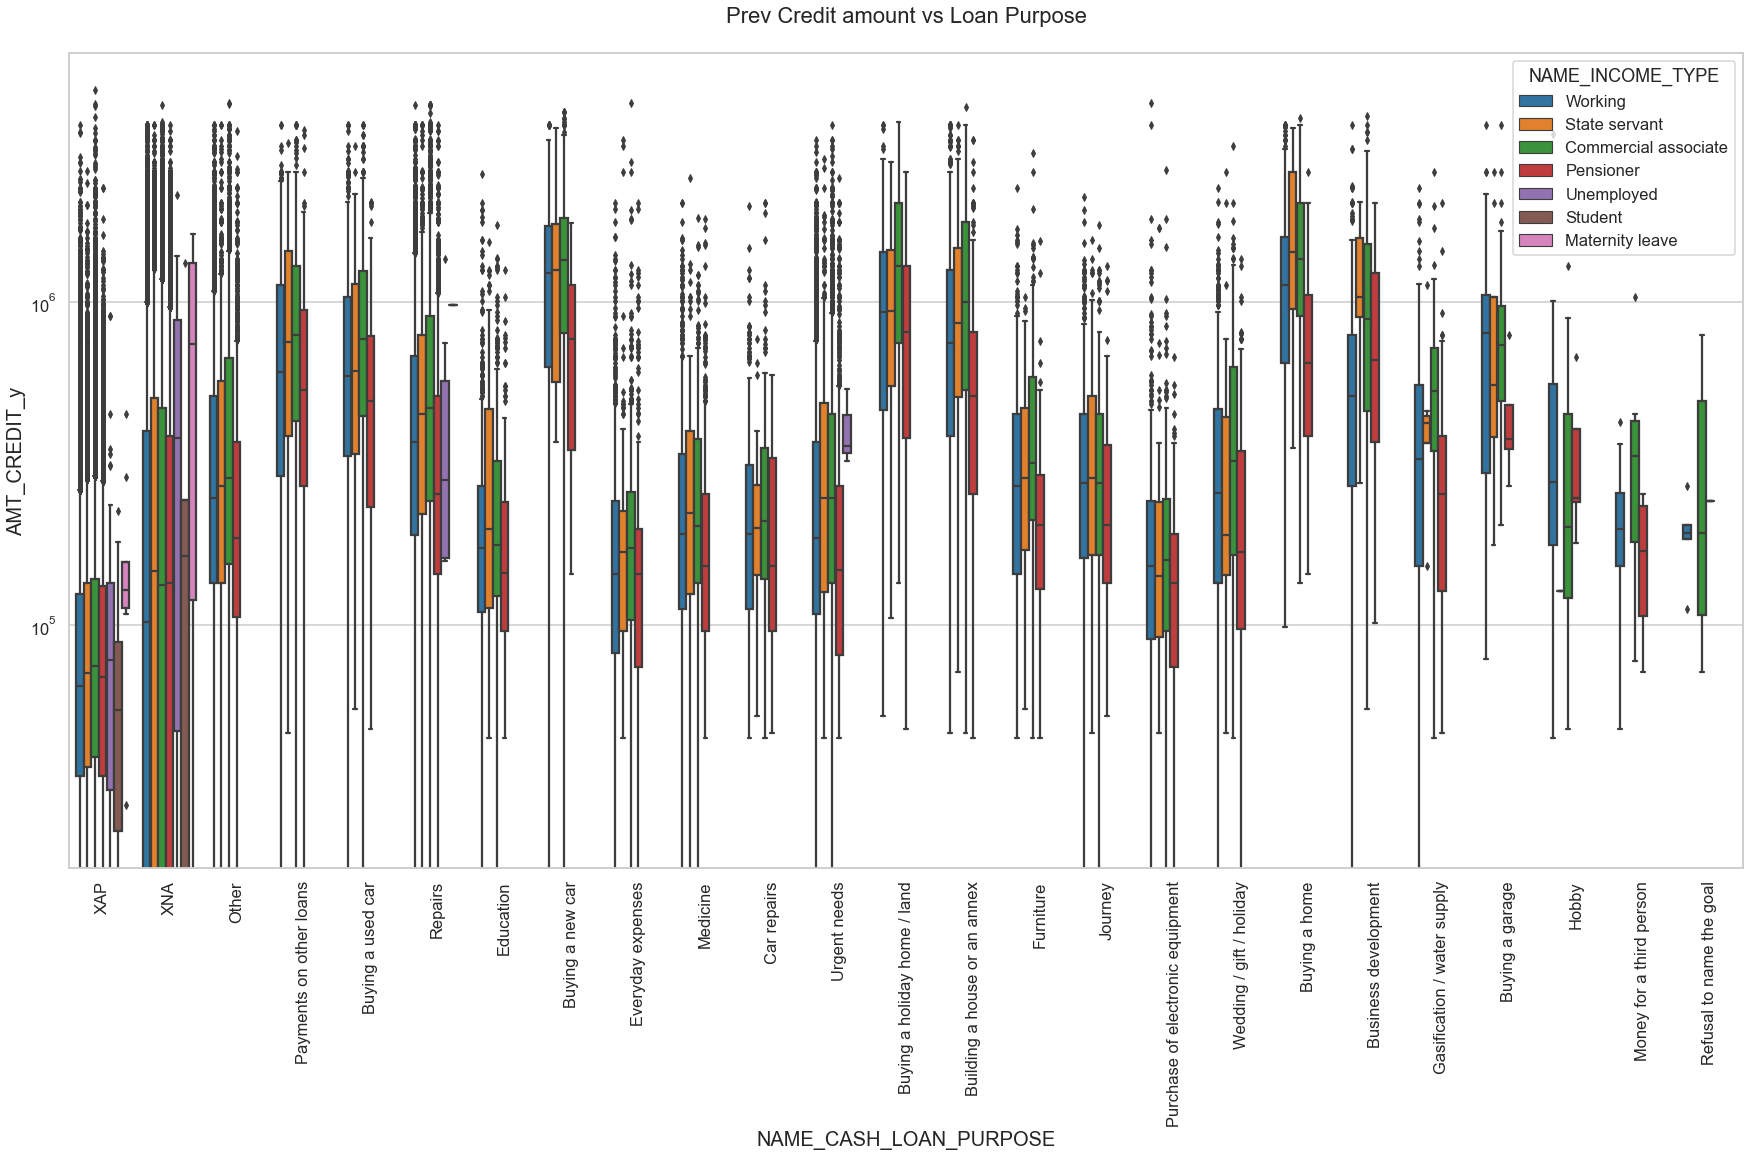

In [107]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =merged_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

<h4 style = "color : Red">Inference: The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a high amount of credit for buying a new home and  Hobby is having less credits. Working income type have highest crdits for buying a new home</h4>

<h3 style = "color : Orange">Box plotting for Credit amount prev vs Housing type in logarithmic scale</h3>

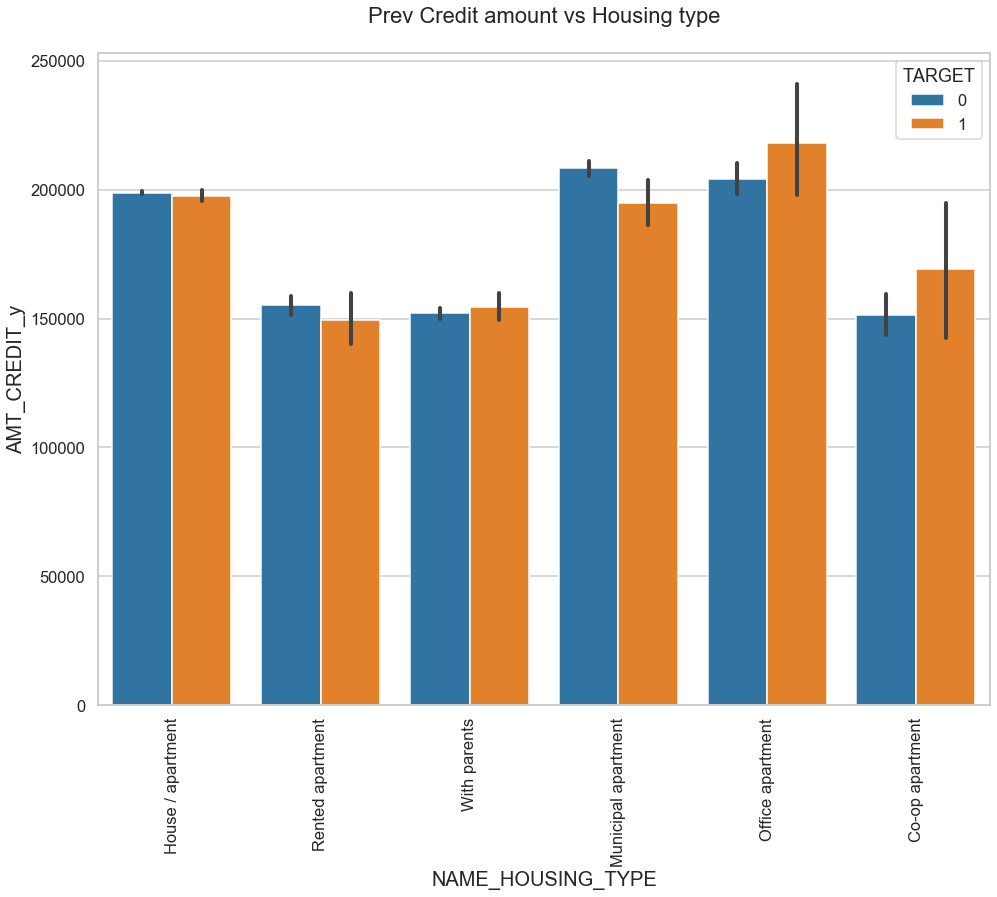

In [108]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

<h4 style = "color : Red">Inference: 
<h4 style = "color : Red">Clients living in office appartment have high difficulties in paying back and those living in municipal appartment don't have much difficulty in paying back</h4>
<h4 style = "color : Red">Banks should focus on clients with housing type of municipal appartment</h4>

<h3 style = "color : #E4508F"> Conclusion</h3>

<h4 style = "color : Green"> After the analysis of datasets banks can consider a few attributes as a deciding factor that whether to approve/refuse a loan or if a client will be a repayer or defaulter</h4>

<h3 style = "color : #E4508F"> Final Words</h3>

<h4 style = "color : Green">Target/focused variable for Application dataset - TARGET</h4> 
<h4 style = "color : Green">Target/focused variable for Previous dataset - NAME_CONTRACT_STATUS</h4> 

<h4 style = "color : Green">Top Major variables to consider for loan prediction:</h4> 

**NAME_EDUCATION_TYPE**
**AMT_INCOME_TOTAL**  
**DAYS_BIRTH**       
**AMT_CREDIT**         
**DAYS_EMPLOYED**     
**AMT_ANNUITY**
**NAME_INCOME_TYPE**  
**CODE_GENDER** 
**NAME_HOUSING_TYPE**

<h4 style = "color : Green">The above mentioned variables are to be considered before approving application to minimize risk of loss</h4>


<h4 style = "color : Green">Detailed descroption is provided in presentation</h4>
